In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data_df = pd.read_csv("../kham_pha_du_lieu/animals_split_info.csv", index_col = 0)
data_df.head()
pd.set_option('display.max_columns', None)

/root/miniconda3/envs/introDS/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3194: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Câu hỏi 1: 
### - Sự đa dạng động vật ở các bậc (Lớp, Bộ, Họ, Chi) như thế nào?
### - Lớp (class) nào có nhiều loài nhất? Tương tự với bộ (order), họ (family), chi (Genus) ?

Ý nghĩa: Giúp chúng ta biết thêm về độ đa dạng của loài ở từng bậc động vật. Biết được lớp nào có nhiều loài nhất.

Nguồn cảm hứng: dựa trên sự tò mò và muốn biết được sự phong phú của các loài. Số lượng loài nhiều nhất ở từng bậc động vật. Từ đó có thể search google bậc đó để tìm hiểu thêm những đặc tính thú vị (như là đa số các loài đó có nguy hiểm hay có nọc độc không? có ăn được không?)

Trước tiên, ta xem loài có phải là phân loại nhỏ nhất thể hiện động vật đó hay không?

In [3]:
Species_count = data_df.value_counts('Species')
Species_count.iloc[:5]

Species
Arctocephalus pusillus     2
Ovis orientalis            2
Origma robusta             1
Orientocoluber spinalis    1
Orienthella fogata         1
dtype: int64

Nhìn chung thì ta có thể thấy được 1 loài thường chỉ chứa 1 nhóm cá thể động vật, nhiều nhất là 2 nhóm (và chỉ có 2 trường hợp). Do đó, ta có thể xem Loài là phân loại nhỏ nhất để xác định động vật đó. Tiếp theo, xét các bậc lớn hơn như Chi, Họ, Bộ, Lớp:

In [4]:
Genus_count = data_df.value_counts('Genus')
Family_count = data_df.value_counts('Family')
Order_count = data_df.value_counts('Order')
Class_count = data_df.value_counts('Class')

Vẽ biểu đồ thể hiện Top 5 các bậc có nhiều loài động vật nhất

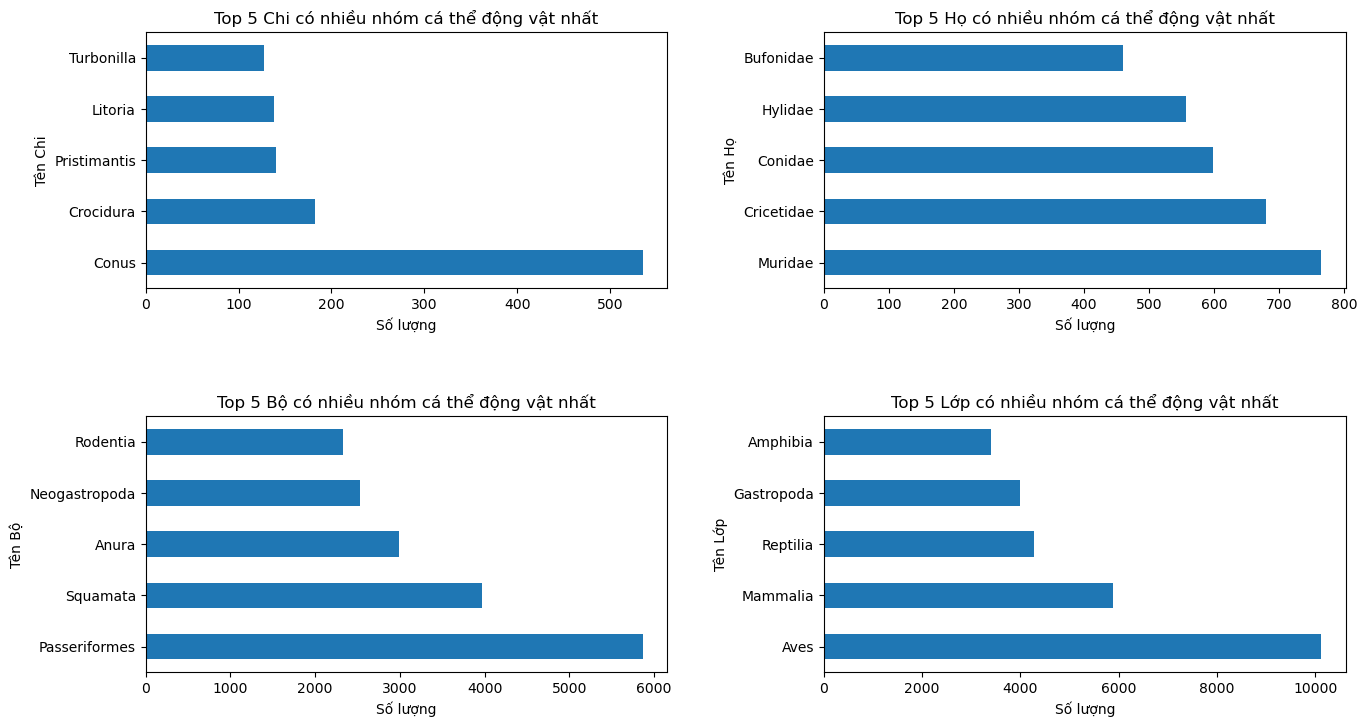

In [5]:
def draw_plot(ax, s, title, xlabel, ylabel):
    s.iloc[:5].plot.barh(ax = ax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
fig, axes = plt.subplots(2, 2, figsize = (15, 8))
draw_plot(axes[0, 0], Genus_count, 'Top 5 Chi có nhiều nhóm cá thể động vật nhất', 'Số lượng', 'Tên Chi')
draw_plot(axes[0, 1], Family_count, 'Top 5 Họ có nhiều nhóm cá thể động vật nhất', 'Số lượng', 'Tên Họ')
draw_plot(axes[1, 0], Order_count, 'Top 5 Bộ có nhiều nhóm cá thể động vật nhất', 'Số lượng', 'Tên Bộ')
draw_plot(axes[1, 1], Class_count, 'Top 5 Lớp có nhiều nhóm cá thể động vật nhất', 'Số lượng', 'Tên Lớp')

plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.3,
                    hspace=0.5)

Nhận xét:
- Nhìn chung thì **số lượng nhóm cá thể động vật** trong từng lớp (Class) nhiều hơn trong từng bộ (Order).Và tương tự, Bộ (Order) nhiều hơn Họ (Family), Họ (Family) nhiều hơn Chi (Genus), Chi (Genus) nhiều hơn Loài (species).

- Điều này là hợp lí vì theo lý thuyết phân loại sinh học thì bậc giảm dần phân loại là Lớp -> Bộ -> Họ -> Chi -> Loài. Một bậc bất kỳ thì bao gồm các bậc ít chung chung hơn mô tả cụ thể hơn về các dạng sống. Bên trên nó có các bậc sinh vật chung chung hơn. 

#### Trả lời cho câu hỏi 1:
- Dựa vào các biểu đồ, ta có thể thấy sự đa dạng ở các bậc rất rõ ràng. Lớp bao gồm nhiều loài hơn Bộ, Bộ hơn Họ, Họ hơn Chi.
- Chi có nhiều loài động vật nhất là Conus - chi Ốc nón (535 loài)
- Họ có nhiều loài động vật nhất là Muridae - họ Chuột (764 loài)
- Bộ có nhiều loài động vật nhất là Passeriformes - bộ Sẻ (5863)
- Lớp có nhiều loài động vật nhất là Aves - Lớp Chim (10114) điều này cũng hợp lí vì ở trang web chúng em cào thì có hơn 10 000 loài Chim. Thú chỉ mới đứng vị trí thứ 2 (hơn 6000 loài)

## Xét lớp thú, xem xét mối quan hệ giữa tốc độ với chiều dài, cân nặng, chiều cao.

Vì các lớp khác có dữ liệu về chiều dài, cân nặng, chiều cao chưa được đầy đủ nên chúng em chỉ xét đến lớp thú. (Mammalia)
### Câu hỏi 2: Liệu rằng có phải do động vật đó có cân nặng lớn thì sẽ chạy chậm hay không ? Hay những con vật có kích thước cao, dài, gọn hơn sẽ có tốc độ chạy nhanh hơn ?

Ý nghĩa: trả lời được câu hỏi này sẽ giúp chúng ta biết được rằng liệu có mối quan hệ nào giữa cân nặng, chiều dài, chiều cao với tốc độ hay không. Nếu có thì có thể làm nghiên cứu sau này, nếu không thì có thể là vì một lí do khác ảnh hưởng đến tốc độ của chúng (ví dụ như môi trường sống, thức ăn,...) và chúng ta không thể khắng định là những con vật có kích thước cao, dài, gọn hơn sẽ có tốc độ chạy nhanh hơn.

Nguồn cảm hứng: từ việc chúng ta hay thấy những động vật có cơ thể thon gọn, trọng lượng vừa phải (như chó, mèo, hổ, báo, ngựa,...) thì thường có tốc độ nhanh hơn so với những loài động vật kích thước lớn như hà mã, voi, gấu trúc,... Vì vậy chúng ta có thể đặt ra câu hỏi là kích thước và trọng lượng có mối liên hệ với tốc độ hay không?

Đầu tiên, chúng ta cùng xét lớp thú:

In [6]:
mammalia_df = data_df[data_df['Class'] == 'Mammalia']

Xoá các outliers của các thuộc tính 'Weight', "Length", 'Height' và 'Top speed' lưu vào biến `removed_outliers`

In [7]:
def remove_outliers(df, cols):
    Q1 = df[cols].quantile(0.25)
    Q3 = df[cols].quantile(0.75)
    IQR = Q3 - Q1

    df = df[~((df[cols] < (Q1 - 1.5 * IQR)) | (df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df
    
removed_outliers = remove_outliers(mammalia_df, ['Weight', "Length", 'Height', 'Top speed'])

In [8]:
removed_outliers[['Weight', 'Length', 'Height', 'Top speed']].corr()

,Weight,Length,Height,Top speed
Weight,1.000000,0.744195,0.724744,0.478023
Length,0.744195,1.000000,0.654417,0.439734
Height,0.724744,0.654417,1.000000,0.403306
Top speed,0.478023,0.439734,0.403306,1.000000


Text(0.5, 1.0, 'Mức độ tương quan giữa cân nặng, chiều dài, chiều cao và tốc độ')

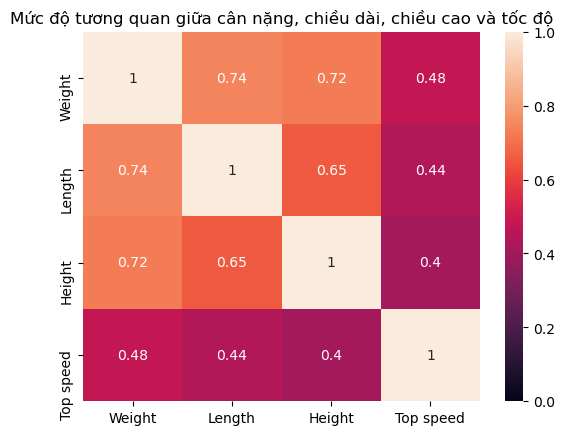

In [9]:
sns.heatmap(removed_outliers[['Weight', 'Length', 'Height', 'Top speed']].corr(), vmin=0, vmax=1, annot=True)
plt.title('Mức độ tương quan giữa cân nặng, chiều dài, chiều cao và tốc độ')

Nhìn vào bảng ta có thể thấy được độ tương quan giữa các thuộc tính 'Weight', "Length", 'Height' đối với 'Top speed' không quá cao, bé hơn 0.5 nên có thể khẳng định là **có mối quan hệ** giữa yếu tố **chiều cao, cân nặng, chiều dài** với **Top speed** nhưng khoogn mạnh mẽ. 

Vẽ biểu đồ thể hiện mối quan hệ giữa tốc độ với cân nặng, chiều dài, chiều cao để xem các điểm dữ liệu phân bố như thế nào:

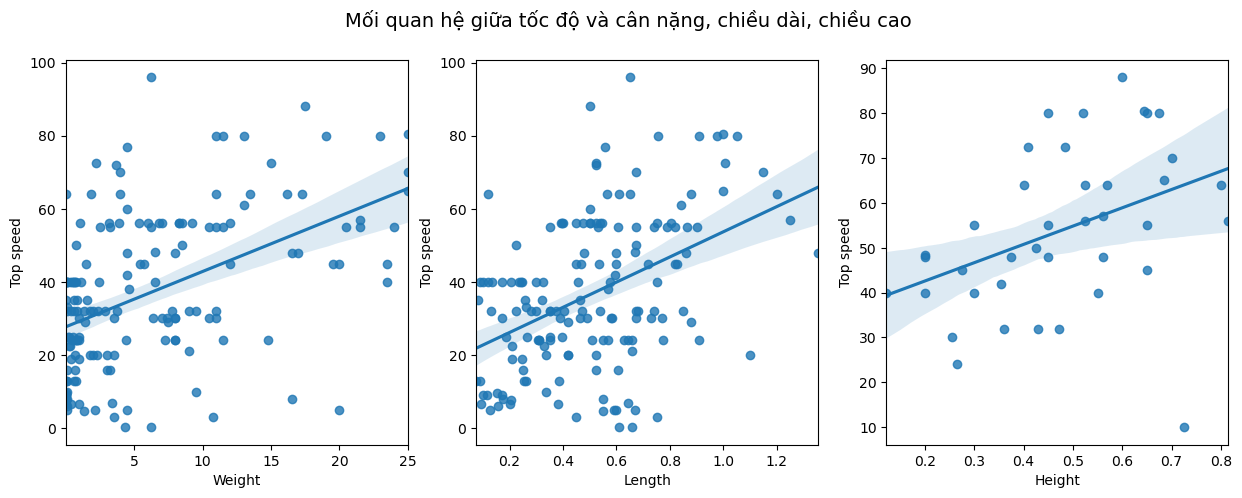

In [10]:
fig, axes = plt.subplots(1, 3, figsize = (15, 5))
sns.regplot(ax = axes[0], data=removed_outliers, x='Weight', y='Top speed')
sns.regplot(ax = axes[1], data=removed_outliers, x='Length', y='Top speed')
sns.regplot(ax = axes[2], data=removed_outliers, x='Height', y='Top speed')
plt.suptitle('Mối quan hệ giữa tốc độ và cân nặng, chiều dài, chiều cao', fontsize = 14);

Theo như biểu đồ thể hiện mối quan hệ giữa các yếu tố **chiều cao, cân nặng, chiều dài** với **Top speed**, có vẻ như các yếu tố cũng có mối liên hệ đến tốc độ của động vật đó nhưng không nhiều, có rất nhiều điểm dữ liệu nằm rời rạc và cách xa đường hồi quy. Điều này phù hợp với bảng tương quan phía trên. Giờ thì ta cũng hiểu tại sao độ tương quan ở dưới mức 0.5. Ở biểu đồ thứ 3 thì dữ liệu cũng khá ít nên chúng ta vẫn chưa thể kết luận về ảnh hưởng của chiều cao đến tốc độ của loài thuộc lớp thú. 
